In [4]:
# from https://cospar.readthedocs.io/en/latest/20210121_all_hematopoietic_data_v3.html
import cospar as cs
import numpy as np
import anndata as ad

In [16]:
cs.logging.print_version()
cs.settings.verbosity = 2
cs.settings.data_path = "/home/users/kzlin/kzlinlab/projects/scContrastiveLearn/out/kevin/Writeup4/LARRY_data"  # A relative path to save data. If not existed before, create a new one.
cs.settings.figure_path = "/home/users/kzlin/kzlinlab/projects/scContrastiveLearn/out/kevin/Writeup4/LARRY_figure"  # A relative path to save figures. If not existed before, create a new one.
cs.settings.set_figure_params(
    format="png", figsize=[4, 3.5], dpi=75, fontsize=14, pointsize=2
)

Running cospar 0.4.1 (python 3.9.20) on 2024-10-15 21:24.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [5]:
adata = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/scContrastiveLearn/out/kevin/Writeup5/Larry_41093_2000_norm_log_cleaned.h5ad")
adata

AnnData object with n_obs × n_vars = 41093 × 2000
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'Time point', 'clone_id', 'n_genes'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'data_des', 'hvg', 'log1p'
    obsm: 'X_clone', 'X_emb'
    layers: 'raw_counts'

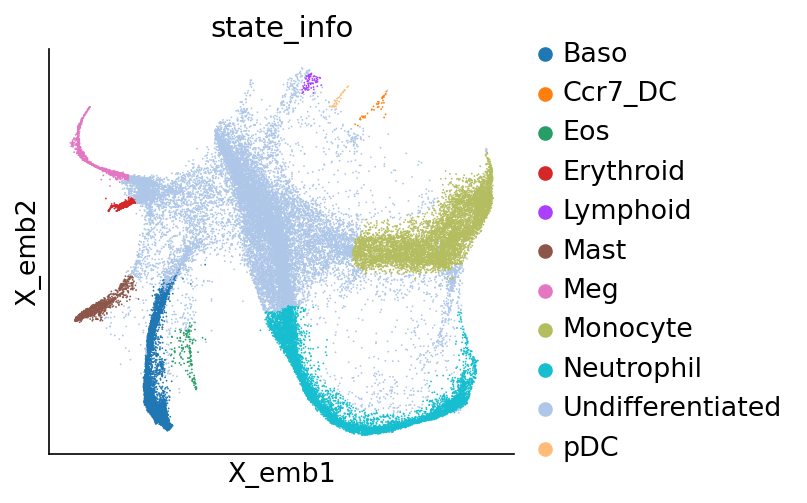

In [6]:
cs.pl.embedding(adata, color="state_info")

In [8]:
cs.hf.check_available_choices(adata)

Available transition maps: []
Available clusters: ['Mast', 'Eos', 'Baso', 'pDC', 'Erythroid', 'Undifferentiated', 'Lymphoid', 'Monocyte', 'Ccr7_DC', 'Neutrophil', 'Meg']
Available time points: [2. 4. 6.]
Clonal time points: [2. 4. 6.]


<Axes: title={'center': 'ID: 1'}>

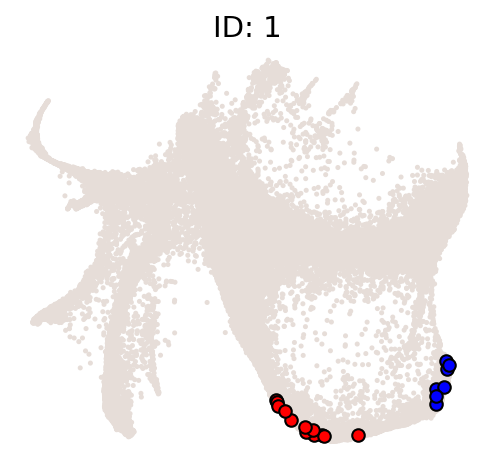

In [9]:
cs.pl.clones_on_manifold(
    adata, selected_clone_list=[1], color_list=["black", "red", "blue"]
)

Results saved as dictionary at adata.uns['fate_coupling_X_clone']


<Axes: title={'center': 'source: X_clone'}>

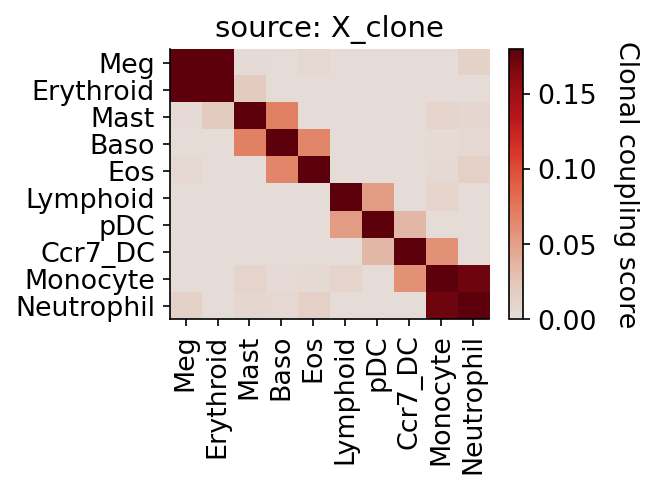

In [12]:
selected_times = 4
selected_fates = [
    "Ccr7_DC",
    "Mast",
    "Meg",
    "pDC",
    "Eos",
    "Lymphoid",
    "Erythroid",
    "Baso",
    "Neutrophil",
    "Monocyte",
]
cs.tl.fate_coupling(
    adata,
    source="X_clone",
    selected_fates=selected_fates,
    selected_times=selected_times,
    normalize=False,
)
cs.pl.fate_coupling(adata, source="X_clone")

Data saved at adata.uns['barcode_heatmap']


<Axes: title={'center': '1087 clones'}>

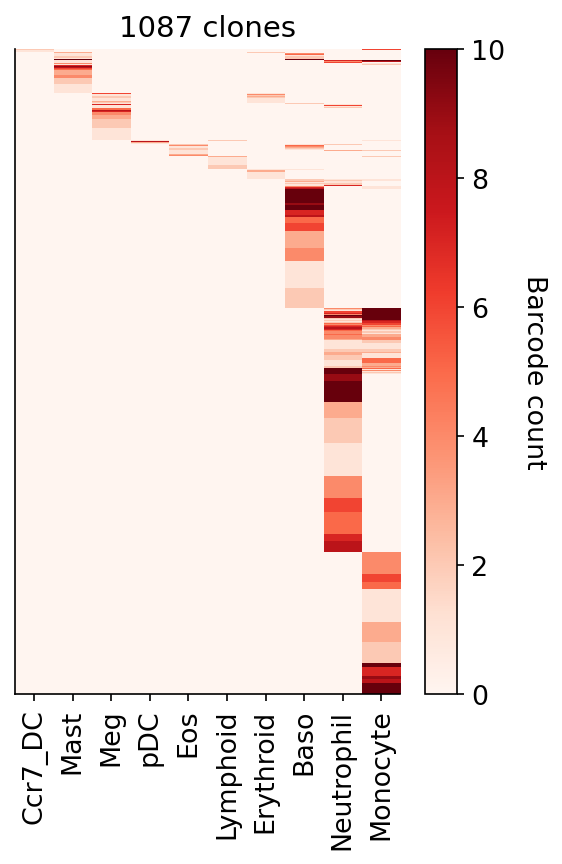

In [14]:
cs.pl.barcode_heatmap(
    adata,
    selected_times=selected_times,
    selected_fates=selected_fates,
    color_bar=True,
)

Infer transition map from all clonal data

In [ ]:
adata = cs.tmap.infer_Tmap_from_multitime_clones(
    adata,
    clonal_time_points=[2, 4, 6],
    later_time_point=6,
    smooth_array=[20, 15, 10],
    sparsity_threshold=0.2,
    max_iter_N=3,
)

------Compute the full Similarity matrix if necessary------
Smooth round: 1
Smooth round: 2
Smooth round: 3
